## 逻辑回归解决多分类问题
+ 案例：手写数字识别
+ 数据集：ex3data1.mat（.mat 格式是 matlab 的一种数据格式）使用 scipy 库中的 io 模块的 loadmat 函数进行 mat 文件的读取

In [2]:
# 导入数据
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [3]:
data = sio.loadmat('ex3data1.mat')

In [5]:
data  # data 其实是一种字典格式 {key:value}

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [8]:
type(data) # 验证是否为字典格式

dict

In [9]:
data.keys() # data 的键

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [10]:
# 获取数据
raw_X = data['X']
raw_y = data['y']

In [11]:
print(raw_X.shape, raw_y.shape)

(5000, 400) (5000, 1)


In [25]:
# 画一张图
def plot_an_image(X):
    pick_one = np.random.randint(5000) # 随机生成 0-4999 之间的任意一个整数
    image = X[pick_one, :]
    fig, ax = plt.subplots(figsize=(1,1))
    ax.imshow(image.reshape(20,20).T, cmap = 'gray_r')
    plt.xticks([]) # 取消 x 刻度
    plt.yticks([]) # 取消 y 刻度
    plt.show()

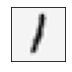

In [26]:
plot_an_image(raw_X)

In [34]:
# 打印 100 张图片
def plot_100_image(X):
    sample_index = np.random.choice(len(X), 100)
    images = X[sample_index, :]
    print(images.shape)
    
    fig, ax = plt.subplots(ncols=10, nrows=10, figsize=(8,8), sharex=True, sharey=True)  
    
    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(images[10 * r + c].reshape(20,20).T, cmap='gray_r') 
    
    plt.xticks([]) # 取消 x 刻度
    plt.yticks([]) # 取消 y 刻度
    plt.show()

(100, 400)


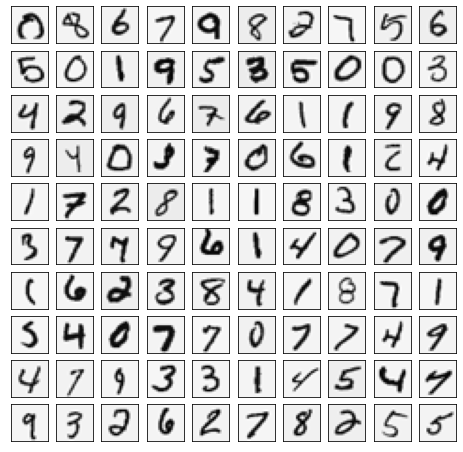

In [35]:
plot_100_image(raw_X)

----

我们**以往都是利用梯度下降函数对损失函数进行最小化处理**，我们这里使用 scipy 里面的子模块（优化模块）对损失函数进行优化

![image1.png](<https://i.typlog.com/tanxy/8336875089_88734.png>)

scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

+ fun: 要优化的函数
+ Method: 优化的方法
+ jac: 梯度向量
+ x0: 参数初始值 (n), (n,1)

Method 有很多，我们这里使用的是 **TNC** 方法（截断牛顿算法） truncated Newton(TNC) algorithm

补充个知识点：

![image.png](<https://i.typlog.com/tanxy/8336875064_288759.png>)

## Sigmoid 函数

In [40]:
def sigmoid(z):
    return  1 / (1 + np.exp(-z))

## 损失函数

In [59]:
def costFunction(theta, X, y, lamda):
    A = sigmoid(X@theta)
    
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    
    reg = theta[1:] @ theta[1:] * (lamda / (2 * len(X)))
    
    return -np.sum(first + second) / len(X) + reg

## 获取梯度向量

In [60]:
def gardient_reg(theta, X, y, lamda):
    reg = theta[1:] * (lamda / len(X))
    reg = np.insert(reg, 0, values=0, axis=0)
    
    first = (X.T@(sigmoid(X@theta) -y )) / len(X)
    
    return first + reg

In [61]:
# 对 X 进行处理
X = np.insert(raw_X,0, values=1, axis=1)
X.shape

(5000, 401)

In [62]:
# 对 y 进行处理（去掉一个维度）
y = raw_y.flatten()
y.shape

(5000,)

## 使用 scipy 的优化函数进行处理

In [63]:
from scipy.optimize import minimize

def one_vs_all(X, y, lamda, K):
    n = X.shape[1] # X 的特征个数
    theta_all = np.zeros((K,n))
    
    for i in range(1,K+1):
        theta_i = np.zeros(n,)
        
        res = minimize(fun = costFunction, x0=theta_i, args=(X,y ==i, lamda), method='TNC', jac=gardient_reg)
        theta_all[i-1,:] = res.x
    return theta_all

In [64]:
lamda = 1
K = 10

In [65]:
theta_final = one_vs_all(X, y, lamda, K)

In [66]:
theta_final

array([[-2.38161322e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30443875e-03, -7.46614921e-10,  0.00000000e+00],
       [-3.18424598e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45809777e-03, -5.08268007e-04,  0.00000000e+00],
       [-4.79683980e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87602778e-05, -2.47281993e-07,  0.00000000e+00],
       ...,
       [-7.98707330e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.94820479e-05,  7.21528197e-06,  0.00000000e+00],
       [-4.57330391e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33547404e-03,  9.98705604e-05,  0.00000000e+00],
       [-5.40446774e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16506760e-04,  7.86681357e-06,  0.00000000e+00]])

## 预测函数

In [68]:
def predict(X, theta_final):
    h = sigmoid(X@theta_final.T) #(5000,401)(10,401) -> (5000,10)
    h_argmax = np.argmax(h, axis=1)
    return h_argmax + 1

In [69]:
y_pred = predict(X, theta_final)

In [70]:
acc = np.mean(y_pred == y)

In [71]:
acc

0.9446